<a href="https://colab.research.google.com/github/rishi-29-02/Aspiration-Career-Launcher/blob/main/Modulen3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Module 3 : Fundamental Analysis using Regression

#3.1

Import the file 'gold.csv', which contains the data of the last 2 years price action of Indian (MCX) gold standard. Explore the dataframe. You'd see 2 unique columns - 'Pred' and 'new'. One of the 2 columns is a linear combination of the OHLC prices with varying coefficients while the other is a polynomial function of the same inputs. 

Also, one of the 2 columns is partially filled. Using linear regression, find the coefficients of the inputs and using the same trained model, complete the entire column. 

Also, try to fit the other column as well using a new linear regression model. Check if the predictions are accurate. Mention which column is a linear function and which is polynomial. (Hint: Plotting a histogram & distplot helps in recognizing the discrepencies in prediction, if any.)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#from google.colab import files
#uploaded = files.upload()

In [ ]:
data = pd.read_csv('GOLD.csv')
data.head()

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
0,"May 04, 2017",28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
1,"May 05, 2017",28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
2,"May 08, 2017",28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
3,"May 09, 2017",27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064
4,"May 10, 2017",28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318


In [ ]:
data.shape

(512, 9)

Therefore, there are 512 instances and 9 features.

In [ ]:
data.describe(include='all')

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
count,512,512.000000,512.000000,512.000000,512.000000,512,512,411.000000,512.000000
unique,512,NaN,NaN,NaN,NaN,396,205,NaN,NaN
top,"Nov 16, 2017",NaN,NaN,NaN,NaN,0.19K,0.21%,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,6,11,NaN,NaN
mean,NaN,30364.583984,30368.412109,30491.089844,30243.320312,NaN,NaN,341.712895,245.161859
std,NaN,1284.378623,1296.856656,1307.031684,1271.936410,NaN,NaN,271.075609,205.788897
min,NaN,27812.000000,27805.000000,27887.000000,27620.000000,NaN,NaN,-146.000000,11.109814
25%,NaN,29432.500000,29436.750000,29499.750000,29345.750000,NaN,NaN,156.500000,101.369172
50%,NaN,30427.500000,30399.500000,30545.000000,30286.000000,NaN,NaN,299.000000,184.537244
75%,NaN,31271.750000,31300.000000,31447.500000,31160.750000,NaN,NaN,475.000000,320.835031


From the describe, we infer that the Pred feature has only 411 instances.

In [ ]:
data.dtypes

Date         object
Price         int64
Open          int64
High          int64
Low           int64
Vol.         object
Change %     object
Pred        float64
new         float64
dtype: object

Changing the type of Date column to datetime64(ns).

In [ ]:
data.Date = pd.to_datetime(data.Date)
data.dtypes

Date        datetime64[ns]
Price                int64
Open                 int64
High                 int64
Low                  int64
Vol.                object
Change %            object
Pred               float64
new                float64
dtype: object

In [ ]:
data.set_index('Date', inplace=True)
data

,Price,Open,High,Low,Vol.,Change %,Pred,new
Date,,,,,,,,
2017-05-04,28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
2017-05-05,28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
2017-05-08,28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
2017-05-09,27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064
2017-05-10,28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318
...,...,...,...,...,...,...,...,...
2019-04-26,31868,31851,31934,31705,9.67K,0.08%,NaN,247.177322
2019-04-30,31625,31800,31824,31597,6.44K,-0.76%,NaN,52.201158
2019-05-01,31563,31604,31657,31503,1.55K,-0.20%,NaN,113.293305


Data Cleaning

In [ ]:
data['Vol.'] = data['Vol.'].str[:-1].astype(float) * 1000
data['Change %'] = data['Change %'].str[:-1].astype(float) 

In [ ]:
data_train = data[data['Pred'].notna()]
data_test = data[data['Pred'].isna()]

In [ ]:
X = data_train.iloc[:, 0:6].values
Y = data_train.iloc[:, 6].values
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=1)

model = LinearRegression()
model.fit(x_train, y_train)

print('Regression coefficients : \n')
print('Slope : ', model.coef_)
print('Intercept : ', model.intercept_)

predictions = model.predict(x_test)

mse = mean_squared_error(y_test, predictions)
print("MSE: %.25f" % mse)

Regression coefficients : 

Slope :  [ 2.  3. -1. -4. -0. -0.]
Intercept :  6.934897101018578e-12
MSE: 0.0000000000000000000000444


From the value of the mean_squared_error it is clear that there is a linear relationship in between the OHLC prices and Pred.

Our inference got strenghtened from the following plot :  

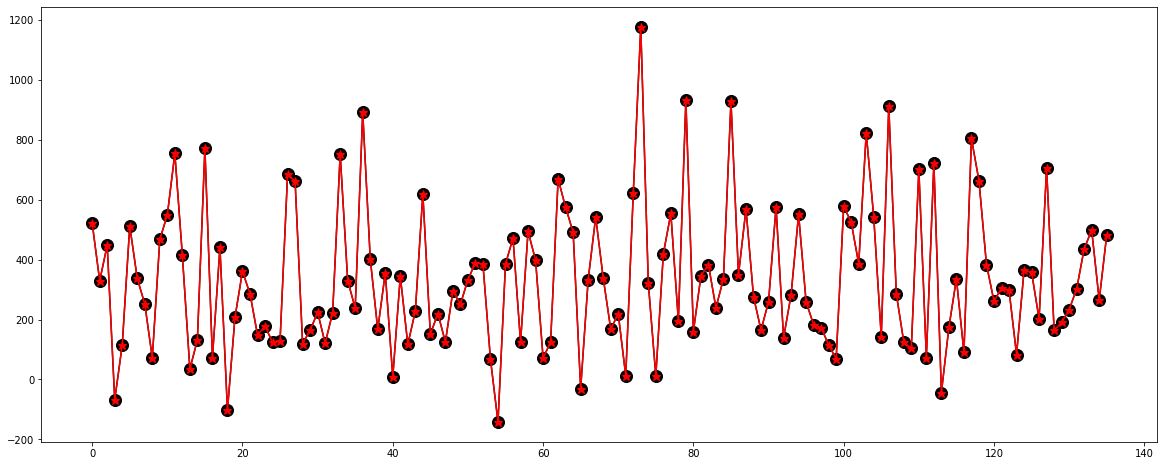

In [ ]:
plt.figure(figsize=(20, 8))
plt.plot(y_test, linestyle='-', color='k', marker='o', markersize=12)
plt.plot(predictions, color='r', marker='*', markersize=9)
plt.show()

In [ ]:
x_1 = data_test.iloc[:, 0:6].values
f_predictions = model.predict(x_1)
data_test['Pred'] = f_predictions

data = pd.concat([data_train, data_test])
data.describe(include='all')

,Price,Open,High,Low,Vol.,Change %,Pred,new
count,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000
mean,30364.583984,30368.412109,30491.089844,30243.320312,7653.515625,0.019883,370.033203,245.161859
std,1284.378623,1296.856656,1307.031684,1271.936410,4137.838160,0.573099,341.296591,205.788897
min,27812.000000,27805.000000,27887.000000,27620.000000,20.000000,-1.790000,-146.000000,11.109814
25%,29432.500000,29436.750000,29499.750000,29345.750000,5770.000000,-0.330000,164.000000,101.369172
50%,30427.500000,30399.500000,30545.000000,30286.000000,7770.000000,0.005000,322.000000,184.537244
75%,31271.750000,31300.000000,31447.500000,31160.750000,10302.500000,0.330000,495.000000,320.835031
max,33753.000000,34247.000000,34400.000000,33680.000000,23800.000000,1.990000,3024.000000,1407.321485


Thus predictions are made and dataframe got updated.

#3.2 

CAPM Analysis and Beta Calculation using linear regression
CAPM(Capital Asset Pricing Model) attempts to price securities by examining the relationship that exists between expected returns and risk.

Read more about CAPM. (Investopedia CAPM reference)

The Beta of an asset is a measure of the sensitivity of its returns relative to a market benchmark (usually a market index). How sensitive/insensitive is the returns of an asset to the overall market returns (usually a market index like S&P 500 index). What happens when the market jumps, does the returns of the asset jump accordingly or jump somehow?

Read more about Beta (Investopedia Beta reference)



Import the stock of your choosing AND the Nifty index.

Using linear regression (OLS), calculate -

The daily Beta value for the past 3 months. (Daily= Daily returns)

The monthly Beta value. (Monthly= Monthly returns)

Refrain from using the (covariance(x,y)/variance(x)) formula.

Attempt the question using regression.(Regression Reference)

Were the Beta values more or less than 1 ? What if it was negative ?

Discuss. Include a brief writeup in the bottom of your jupyter notebook with your inferences from the Beta values and regression results

**The daily Beta value for the past 3 months. (Daily= Daily returns)**

In [ ]:
#from google.colab import files
#uploaded = files.upload()

In [ ]:
tcs_data_1 = pd.read_csv('TCS.csv')
tcs_data = tcs_data_1.copy() 
tcs_data = tcs_data[tcs_data['Series']=='EQ']
tcs_data.Date = pd.to_datetime(tcs_data['Date'])
tcs_data.set_index('Date', inplace=True)
tcs_data

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
Date,,,,,,,,,,,,,,
2017-05-15,TCS,EQ,2360.65,2375.10,2377.95,2341.60,2368.00,2365.10,2352.60,908802,2.138043e+09,30047,712450,78.39
2017-05-16,TCS,EQ,2365.10,2380.00,2435.00,2373.45,2425.10,2429.15,2410.26,1800513,4.339703e+09,58476,1167534,64.84
2017-05-17,TCS,EQ,2429.15,2433.50,2460.75,2423.00,2450.00,2455.35,2443.31,1438099,3.513729e+09,86412,1031752,71.74
2017-05-18,TCS,EQ,2455.35,2450.00,2572.00,2442.25,2525.00,2536.20,2525.78,2569297,6.489478e+09,111566,1135613,44.20
2017-05-19,TCS,EQ,2536.20,2536.20,2540.55,2486.00,2503.85,2507.15,2506.58,893022,2.238430e+09,63112,517461,57.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-07,TCS,EQ,2157.85,2160.05,2184.35,2138.80,2154.00,2151.95,2163.53,2201698,4.763441e+09,86096,975603,44.31
2019-05-08,TCS,EQ,2151.95,2151.00,2168.00,2130.40,2156.00,2152.85,2151.85,1824895,3.926902e+09,77713,781526,42.83
2019-05-09,TCS,EQ,2152.85,2145.00,2184.10,2136.10,2171.20,2172.55,2166.98,2264162,4.906405e+09,106297,1251459,55.27


In [ ]:
nifty_1 = pd.read_csv('Nifty50.csv')
nifty = nifty_1.copy()
print(nifty)
nifty.Date = pd.to_datetime(nifty.Date)
nifty.set_index('Date', inplace=True)

            Date      Open  ...  Shares Traded  Turnover (Rs. Cr)
0    15-May-2017   9433.55  ...      145163953            7790.97
1    16-May-2017   9461.00  ...      171709433            9209.89
2    17-May-2017   9517.60  ...      211856040           10726.23
3    18-May-2017   9453.20  ...      199340647           10782.46
4    19-May-2017   9469.90  ...      259861396           11544.77
..           ...       ...  ...            ...                ...
489  07-May-2019  11651.50  ...      337495624           16632.84
490  08-May-2019  11478.70  ...      372826025           17440.01
491  09-May-2019  11322.40  ...      373028059           17602.86
492  10-May-2019  11314.15  ...      387323416           18085.19
493  13-May-2019  11258.70  ...      357586433           16722.91

[494 rows x 7 columns]


In [ ]:
df_close_pct = pd.DataFrame({'Nifty50': nifty['Close'].pct_change(),
                         'TCS': tcs_data['Close Price'].pct_change()}).dropna()
df_close_pct_last3 = df_close_pct.last('3M')

# Splitting into the dependent and independent varible
x = df_close_pct_last3['Nifty50']
y = df_close_pct_last3['TCS']

# Adding a constant to the independent value
x1 = sm.add_constant(x)

# make the regression model
model = sm.OLS(y, x1) # Ordinary least squares Linear Regression

# fitting the model
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    TCS   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     4.211
Date:                Sun, 28 Feb 2021   Prob (F-statistic):             0.0462
Time:                        15:05:07   Log-Likelihood:                 130.91
No. Observations:                  46   AIC:                            -257.8
Df Residuals:                      44   BIC:                            -254.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0012      0.002      0.562      0.5

**The monthly Beta value. (Monthly= Monthly returns)**

In [ ]:
nifty_1.Date = pd.to_datetime(nifty_1.Date)
tcs_data_1.Date =  pd.to_datetime(tcs_data_1.Date)

nifty_1['Month'] = nifty_1['Date'].dt.month
tcs_data_1['Month'] = tcs_data_1['Date'].dt.month

mon_data = pd.DataFrame({'Nifty50': nifty_1.groupby('Month').sum()['Close'],
                         'TCS': tcs_data_1.groupby('Month').sum()['Close Price']}).pct_change().dropna()
mon_data

,Nifty50,TCS
Month,,
2,-0.141638,-0.034609
3,-0.017654,-0.076422
4,0.078513,0.117180
5,0.018402,0.172321
6,-0.049747,-0.285649
7,0.049864,0.052284
8,0.001636,0.006366
9,-0.081240,-0.050007
10,0.019255,0.024078


In [ ]:
Y_month = mon_data['TCS']
X_month = mon_data['Nifty50']

# Add a constant to the independent value
X1_month = sm.add_constant(X_month)

# make regression model
model = sm.OLS(Y_month, X1_month)

# fit model and print results
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    TCS   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.251
Method:                 Least Squares   F-statistic:                     4.355
Date:                Sun, 28 Feb 2021   Prob (F-statistic):             0.0665
Time:                        15:08:00   Log-Likelihood:                 10.420
No. Observations:                  11   AIC:                            -16.84
Df Residuals:                       9   BIC:                            -16.04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0044      0.032      0.140      0.8

**Inferences from the Beta values and regression results**

A stock with a beta of

zero: indicates no correlation with the chosen benchmark 

one: indicates a stock has the same volatility as the market

more than one: indicates a stock that’s more volatile than its benchmark

less than one: is less volatile than the benchmark

1.5 is 50% more volatile than the benchmark.

As our beta value of 3 months is 0.6138 , it means the stock is less volatile than the benchmark.

And monthly beta value is 1.0675 means that the stock is little bit more volatile than the benchmark.

A beta less than 0, which would indicate an inverse relation to the market, is possible but highly unlikely.